- Problem:- We have customer data. We want to make  segmentation
- Data Set :- Bank Customer Data
- Model :- KMeans(Unsupervised)

# Data Collection

In [2]:
# importing Liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Loading

data = pd.read_csv(r'C:\Users\Tuhin\OneDrive\Desktop\BIA PROJECT\bank_transactions.csv')
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5
...,...,...,...,...,...,...,...,...,...
19995,T19996,C2130963,09-08-1989,M,MUMBAI,9961.78,23-09-2016,115919,47.0
19996,T19997,C1214583,02-01-1987,M,KOLKATA,7120.57,23-09-2016,115831,300.0
19997,T19998,C4739783,11-02-1970,M,MUMBAI,118130.78,23-09-2016,193238,3400.0
19998,T19999,C4532552,21-02-1993,M,DELHI,13226.06,23-09-2016,195759,500.0


In [4]:
# copying data for back up

df = data.copy()
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5
...,...,...,...,...,...,...,...,...,...
19995,T19996,C2130963,09-08-1989,M,MUMBAI,9961.78,23-09-2016,115919,47.0
19996,T19997,C1214583,02-01-1987,M,KOLKATA,7120.57,23-09-2016,115831,300.0
19997,T19998,C4739783,11-02-1970,M,MUMBAI,118130.78,23-09-2016,193238,3400.0
19998,T19999,C4532552,21-02-1993,M,DELHI,13226.06,23-09-2016,195759,500.0


In [5]:
#for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


In [8]:
# Convert 'TransactionData' column to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d-%m-%Y')

# Display dataframe information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            20000 non-null  object        
 1   CustomerID               20000 non-null  object        
 2   CustomerDOB              19928 non-null  object        
 3   CustGender               19989 non-null  object        
 4   CustLocation             19999 non-null  object        
 5   CustAccountBalance       19973 non-null  float64       
 6   TransactionDate          20000 non-null  datetime64[ns]
 7   TransactionTime          20000 non-null  int64         
 8   TransactionAmount (INR)  20000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.4+ MB


In [13]:
#checking Duplicate value
df[df.duplicated()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [15]:
#Checking Null Value
df.isnull().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                72
CustGender                 11
CustLocation                1
CustAccountBalance         27
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [18]:
#Drouping null value

df.dropna(inplace = True)

In [19]:
#Checking Null Value
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [20]:
df_transaction = df[['CustAccountBalance','TransactionAmount (INR)']]
df_transaction.head()

,CustAccountBalance,TransactionAmount (INR)
0,17819.05,25.0
1,2270.69,27999.0
2,17874.44,459.0
3,866503.21,2060.0
4,6714.43,1762.5


In [21]:
#Data Scaling
scaler = StandardScaler()
df_transaction_scaled = scaler.fit_transform(df_transaction)

In [23]:
#Finding optimum no. of cluster using Elbow method
k = range(2,11)
inertia = []
for i in k:
    kmeans = KMeans(n_clusters = i , random_state = 42)
    kmeans.fit(df_transaction_scaled)
    inertia.append(kmeans.inertia_)
inertia

[27870.678434051297,
 16554.843529289617,
 13842.973088012506,
 11126.944752888707,
 8169.956464971113,
 5045.941398165762,
 4003.0531103507856,
 3145.1161239178305,
 2775.645755925632]

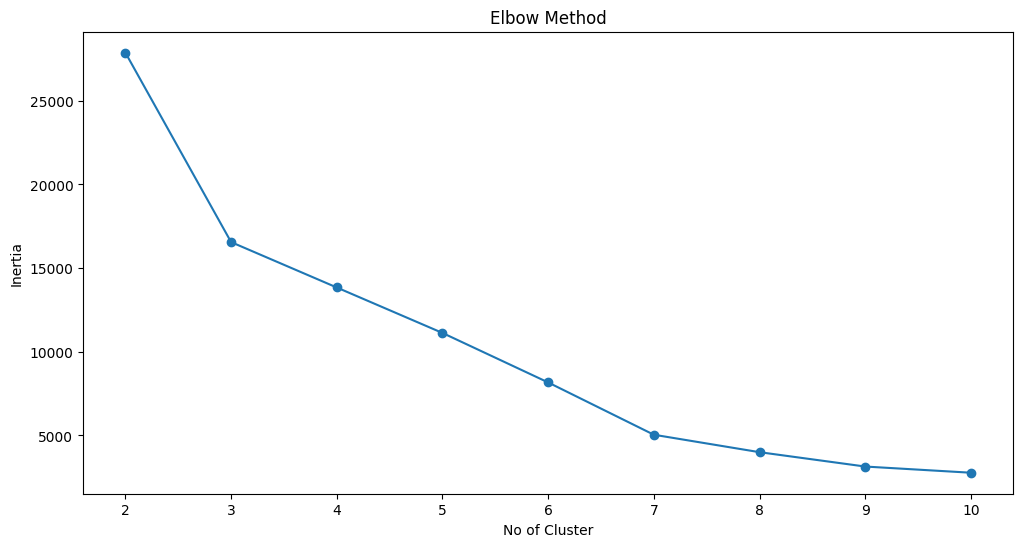

In [26]:
#Elbow method plot
plt.figure(figsize = (12,6))
plt.plot(k, inertia , marker = 'o')
plt.xlabel('No of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [28]:
#Best k and retraining and predivtion
best_k = 3
best_kmeans = KMeans(n_clusters = best_k , random_state = 42)
df['Clusters'] =best_kmeans.fit_predict(df_transaction_scaled)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Clusters
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0,0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,0


In [30]:
df['Clusters'].value_counts()

Clusters
0    19724
1      148
2       17
Name: count, dtype: int64

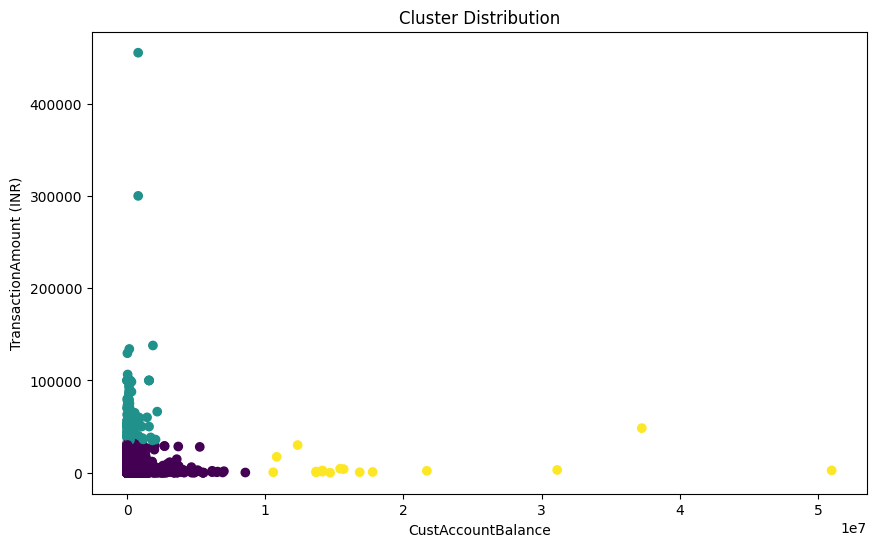

In [34]:
# Visualizing the cluster

plt.figure(figsize = (10,6))
plt.scatter(df['CustAccountBalance'],df['TransactionAmount (INR)'] , c = df['Clusters'] , cmap = 'viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('Cluster Distribution')
plt.show()